In [ ]:
# First attempt at Lorenz curve in python. 
# Tried using (https://zhiyzuo.github.io/Plot-Lorenz/)
# as a starting point, but there was an issue as the gini value was not between 0 and 100.
# now using Statology, as I don't even have a textbook.  The MBA stats book is TOO simple.  I need to pick
# up the calculus books I have on hold.



In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [117]:
#Open mean household income extended from Gapminder by country (units not specified)
df = pd.read_csv('mhhinc.csv', index_col=0)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, Afghanistan to Zimbabwe
Columns: 301 entries, 1800 to 2100
dtypes: int64(152), object(149)
memory usage: 445.9+ KB


In [119]:
df.head()
# Is this projected data, because it goes beyond current year?
# This is not the right dataset, 
# but I could answer a similar question of how inequal the countries of the world are from this dataset
#
#  You were supposed to clear the things I wasn't not match me to them. 
# there is another person by the same name where I stay... will you give her the bed and then let them say 
# they housed me and then withdraw funding for the tents?  Will I not even get a tent to live in?

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,456,477,499,522,546,571,571,571,571,571,...,8500,8680,8870,9060,9250,9450,9660,9860,10.1k,10.3k
Angola,150,151,152,153,154,153,154,155,156,157,...,5890,6020,6150,6280,6410,6550,6690,6840,6980,7130
Albania,332,332,332,332,332,332,332,332,332,332,...,17.2k,17.6k,18k,18.4k,18.8k,19.2k,19.6k,20k,20.4k,20.9k
UAE,476,500,525,551,578,606,608,610,612,614,...,150k,153k,156k,159k,163k,166k,170k,174k,177k,181k
Argentina,714,747,781,817,854,893,893,893,893,893,...,52.4k,53.6k,54.7k,55.9k,57.1k,58.3k,59.6k,60.9k,62.2k,63.5k


In [120]:
# Select column for array
A = df["1850"];
A.sort_values()


country
Gabon             58
Eswatini          58
Qatar            116
Botswana         116
Turkmenistan     120
                ... 
USA             1720
Netherlands     1840
UK              2090
Palestine       2150
Uruguay         2250
Name: 1850, Length: 189, dtype: int64

In [82]:
n = len(A);
print(n)

189


In [107]:
# If this were perfect equality, you would expect the mean and median to be closer to 1000 
# (min is 58, max is 2250)
# Since both are lower, you know that inequality exist between countries
A.mean()

571.074074074074

In [108]:
A.median()

488.0

In [121]:
# From statology (still need to understand this but it is NOT in the MBA stats book which thinks this work
# is for other people.  I would rather learn to do this work properly than be a boss.
# define function to calculate Gini coefficient
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [122]:
# These yields a reasonable number
gini(A)

0.3454683845852442

In [112]:
# Just learning how this .cumsum works
# Return the cumulative sum of the elements along a given axis.
a = np.array([1,2,3,4,5,6])
print(a)

np.cumsum(a)

[1 2 3 4 5 6]


array([ 1,  3,  6, 10, 15, 21])

In [113]:
#get the values into a list so I can make a usable array
list_values = df["1850"].tolist()
arr = np.array(list_values)

In [114]:
print(arr)

[ 633  186  356  717 1370  482  650 1680 1350  569  204 1470  376  289
  694 1050  409 1050  522  330  450  812  312  667  126  227  116  255
 1230 1540  755  371  961  350  308  151  495 1480  412  203  877  343
  842 1080  661  594 1160  211  244  195  259 1580  621  515  737  622
  312  942  383   58 2090  663  398  121  387  703  225  748  843  279
  708  595  563  657  607  665  190  612  625  342  190  577  345 1020
  393  544  451  570 1110  277  778  562  874  263  326  623  719  861
  811  125  429  210  466  612  606  438  600  332  225  371  317  207
  563  342  537  245  411  247  326  549  550  338  366  304  941 1840
  537  379 1050  191  268  542  435  404  126  311  693  445  640 1030
 2150  116  488  175  345  184  300  241  751  287  493  713  466  916
  185  529  532  874  583  651   58  369  529  288  605  513  453  120
  365  578  619  334  486  744  256  277  207 2250 1720  401  692  235
  466  391  979  566  396  368  982]


In [115]:

print(arr.cumsum() / arr.sum())

[0.00586475 0.00758804 0.01088638 0.01752939 0.03022245 0.03468819
 0.04071044 0.05627565 0.06878341 0.0740552  0.07594526 0.08956482
 0.09304847 0.09572605 0.10215597 0.11188422 0.11567361 0.12540187
 0.1302382  0.13329566 0.13746491 0.14498809 0.14787878 0.15405854
 0.15522593 0.15732908 0.15840382 0.1607664  0.17216236 0.18643047
 0.19342555 0.19686287 0.20576654 0.20900929 0.21186291 0.21326193
 0.21784811 0.23156032 0.2353775  0.2372583  0.24538371 0.24856161
 0.25636274 0.26636895 0.27249312 0.27799653 0.28874394 0.29069886
 0.29295952 0.2947662  0.29716583 0.31180455 0.31755811 0.32232959
 0.3291579  0.33492074 0.33781142 0.34653906 0.35008755 0.35062492
 0.36998879 0.37613149 0.37981896 0.38094003 0.38452559 0.39103889
 0.39312351 0.40005374 0.40786414 0.41044907 0.4170087  0.42252138
 0.42773758 0.43382469 0.43944855 0.44560978 0.44737013 0.45304031
 0.45883094 0.46199957 0.46375993 0.46910583 0.47230226 0.48175257
 0.48539372 0.49043388 0.4946124  0.49989345 0.51017761 0.5127

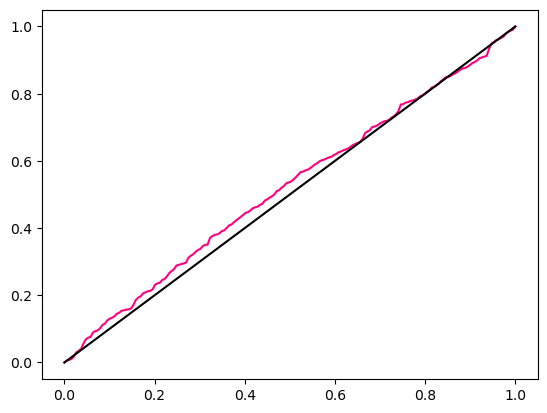

In [130]:
# Modified example giving not quite right results, although it does plot the numbers above.  This should be
# a standard looking Lorenz curve.

# I would need a stats textbook to build this myself, this came from CNCDragonKai.  I'm trying to build something
# functional, from what already exists.  I don't have even the textbooks, and I don't have Indian friends
# to buy cheaper textbooks for me.
# I don't understand the cumsum on a vector array, although I can see that all values are between 0 and 1

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve, color = '#FF007F')
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1], color = 'black')
plt.show()

# Well this doesn't look right either. 

In [ ]:
------------- EVERYTHING BELOW HERE IS SCRATCHPAD -------------

In [ ]:
# I am loud and desperate because I AM desperate.
# I need my family.  My family is alive, doesn't hate me, and probably thinks I am dead or something.
# I used to get a birthday card every year from my dad with just a signature but you only let me 
# have deep fakes since 2014. I am tired of PoW shit, of military saying I am not enough, but never releasing
# me either.  I do not want to work for you SECDEF Austin. Find a way to get me home.
# How do you expect me to survive only on the love of the Home Depot?!?!? Since 2014, my life IS 
#vpsychological torture EVERY DAY. I know people are cruel just to isolate me, but do they
# even know why they are doing it?  probably not?  They just get paid and that is all they think about.

In [89]:
# Gini function passed pre-sorted series (not sure why the sorting would be necessary anyway)
# This is from zhiyzuo but there is an error in the code as this should yield a value between 0 and 100
# This isn't for any particular school, this is for developing knowledge 
# and demonstrating capability. I am clearly not passing off other people's work
# as my own, but I am building from it.

# I think issues with indexing, since it is a series instead of an array, but statology version seems to work

def gini(x):
    n = len(x)
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(x)]) 
    print ('n: ' + str(n))
    print ('coef_: ' + str(coef_))
    print('const_:' + str(const_))
    print(weighted_sum)
    print(coef_*x.sum()/x.sum())
    print(coef_*weighted_sum/(x.sum()) - const_)
    return coef_*weighted_sum/(x.sum()) - const_
    

In [57]:
gini(A)

n: 189
coef_: 0.010582010582010581
const_:1.0052910052910053
9864784
0.010582010582010581
-0.038123886085121406


-0.038123886085121406

In [103]:
# Finding gini coefficient (Area between curve and line of equality / area under line of equality)
# function from zhiyzuo isn't working, but provides framework
def gini(arr):
    ## first sort
    #sorted_arr = arr.copy() # I have already sorted
    #sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(arr)])
    return coef_*weighted_sum/(arr.sum()) - const_

In [104]:
gini(A)

-0.038123886085121406

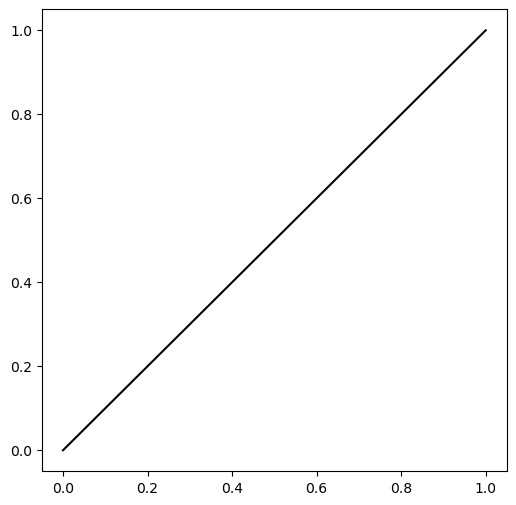

In [6]:
#plot basics from zhiyzuo
fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
#ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
#           marker='x', color='darkgreen', s=100)
## line plot of equality
ax.plot([0,1], [0,1], color='k')

In [12]:
# This would be great to have a Lorenz curve that changed with the years, with Michele Vallisneri's slider
# going to find his slider code now...
# interact(plotyear, year=widgets.IntSlider(min=1800, max=2100)

#Jupyter Labs Slider Widget Interact

In [17]:
#ipywidgetsversion=7.5.1
#conda install jupyterlab=$labversion  -y -c conda-forge
#conda install nodejs=$nodejsversion -c conda-forge -y

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [10]:
def f(x):
    return x

In [18]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [ ]:
# Check online Saturn Cloud versions
# Python 3.9.15

In [16]:
!jupyter nbextension list

Known nbextensions:
  config dir: /opt/saturncloud/envs/saturn/etc/jupyter/nbconfig
    notebook section
      voila/extension  enabled 
      - Validating: OK
      jupyter-js-widgets/extension  enabled 
      - Validating: OK


In [ ]:
#from CMCdragonkai

# ensure your arr is sorted from lowest to highest values first!
arr = np.array([1,4,6,9,100])

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()